## A deep analysis of **Netflix Movies and Shows** database

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Netflix_data = pd.read_csv('/content/netflix_titles.csv')
Netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
Netflix_data.shape

(8807, 12)

In [6]:
Netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
Netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The data is mostly usable. Null values are highest in the Director's column. While dates added are an important information for data interpretation, 10 values in a data set of 8807. 

# **Data PreProcessing**

In [8]:
Netflix_data.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [9]:
import copy
Netflix_Movie_data = copy.deepcopy(Netflix_data[Netflix_data.type == 'Movie'])
Netflix_Shows_data = copy.deepcopy(Netflix_data[~(Netflix_data.type == 'Movie')])

In [10]:
Netflix_Movie_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [11]:
Netflix_Movie_data.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [12]:
Netflix_Movie_data.duration.value_counts()[:1]

90 min    152
Name: duration, dtype: int64

In [13]:
Netflix_Movie_data.duration.fillna('90 min',inplace=True)

In [14]:
Netflix_Movie_data.rating.value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
UR             3
NC-17          3
74 min         1
66 min         1
84 min         1
Name: rating, dtype: int64

In [15]:
Netflix_Movie_data.rating.fillna('TV-PG',inplace=True)

In [16]:
Netflix_Movie_data.loc[Netflix_Movie_data.query('rating in ["84 min","66 min","74 min"]').index,'rating'] = 'TV-PG'

In [17]:
Netflix_Movie_data.country.value_counts()

United States                                   2058
India                                            893
United Kingdom                                   206
Canada                                           122
Spain                                             97
                                                ... 
Denmark, United Kingdom, Sweden                    1
Germany, United States, Hong Kong, Singapore       1
United States, Venezuela                           1
France, Germany, Czech Republic, Belgium           1
Serbia, South Korea, Slovenia                      1
Name: country, Length: 651, dtype: int64

In [18]:
Netflix_Movie_data.country.fillna('India',inplace=True)

In [19]:
Netflix_Movie_data['country'] = Netflix_Movie_data.country.apply(lambda x: x.split(', '))

In [20]:
Netflix_Movie_data = Netflix_Movie_data[~Netflix_Movie_data.director.isna()]

In [21]:
Netflix_Movie_data = Netflix_Movie_data[~Netflix_Movie_data.cast.isna()]

In [22]:
Netflix_Movie_data['director'] = Netflix_Movie_data.director.apply(lambda x: x.split(', '))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
Netflix_Movie_data['cast'] = Netflix_Movie_data.cast.apply(lambda x: x.split(', '))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
Netflix_Movie_data['listed_in'] = Netflix_Movie_data.listed_in.apply(lambda x: x.split(', '))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
Netflix_Movie_data.date_added = pd.to_datetime(Netflix_Movie_data.date_added)

In [26]:
Netflix_Movie_data.drop(['show_id','description','type'],axis=1,inplace=True)

In [27]:
Netflix_Movie_data.query('date_added.dt.year != release_year').head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125 min,"[Dramas, Independent Movies, International Mov..."
22,Avvai Shanmughi,[K.S. Ravikumar],"[Kamal Hassan, Meena, Gemini Ganesan, Heera Ra...",[India],2021-09-21,1996,TV-PG,161 min,"[Comedies, International Movies]"
24,Jeans,[S. Shankar],"[Prashanth, Aishwarya Rai Bachchan, Sri Lakshm...",[India],2021-09-21,1998,TV-14,166 min,"[Comedies, International Movies, Romantic Movies]"
26,Minsara Kanavu,[Rajiv Menon],"[Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P...",[India],2021-09-21,1997,TV-PG,147 min,"[Comedies, International Movies, Music & Music..."
27,Grown Ups,[Dennis Dugan],"[Adam Sandler, Kevin James, Chris Rock, David ...",[United States],2021-09-20,2010,PG-13,103 min,[Comedies]


In [28]:
Netflix_Movie_data.drop(['release_year'],axis=1,inplace=True)

In [29]:
Netflix_Movie_data['duration_in_min'] = Netflix_Movie_data.duration.apply(lambda x: x.split(' ')[0])

In [30]:
Netflix_Movie_data.drop(['duration'],axis=1,inplace=True)

In [31]:
Netflix_Movie_data.set_index('date_added',drop=True,inplace=True)

In [32]:
Netflix_Movie_data.head()

,title,director,cast,country,rating,listed_in,duration_in_min
date_added,,,,,,,
2021-09-24,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[India],PG,[Children & Family Movies],91
2021-09-24,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","[United States, Ghana, Burkina Faso, United Ki...",TV-MA,"[Dramas, Independent Movies, International Mov...",125
2021-09-24,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",[United States],PG-13,"[Comedies, Dramas]",104
2021-09-23,Je Suis Karl,[Christian Schwochow],"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...","[Germany, Czech Republic]",TV-MA,"[Dramas, International Movies]",127
2021-09-22,Confessions of an Invisible Girl,[Bruno Garotti],"[Klara Castanho, Lucca Picon, Júlia Gomes, Mar...",[India],TV-PG,"[Children & Family Movies, Comedies]",91


In [33]:
Netflix_Movie_data.sort_index(inplace=True)

In [34]:
Netflix_Movie_data.duration_in_min = Netflix_Movie_data.duration_in_min.astype('int')

In [35]:
Netflix_Movie_data.head()

,title,director,cast,country,rating,listed_in,duration_in_min
date_added,,,,,,,
2008-01-01,To and From New York,[Sorin Dan Mihalcescu],"[Barbara King, Shaana Diya, John Krisiukenas, ...",[United States],TV-MA,"[Dramas, Independent Movies, Thrillers]",81
2009-05-05,Just Another Love Story,[Ole Bornedal],"[Anders W. Berthelsen, Rebecka Hemse, Nikolaj ...",[Denmark],TV-MA,"[Dramas, International Movies]",104
2009-11-18,Splatter,[Joe Dante],"[Corey Feldman, Tony Todd, Tara Leigh, Erin Wa...",[United States],TV-MA,[Horror Movies],29
2010-11-01,Mad Ron's Prevues from Hell,[Jim Monaco],"[Nick Pawlow, Jordu Schell, Jay Kushwara, Mich...",[United States],NR,"[Cult Movies, Horror Movies]",84
2011-05-17,Even the Rain,[Icíar Bollaín],"[Luis Tosar, Gael García Bernal, Juan Carlos A...","[Spain, Mexico, France]",TV-MA,"[Dramas, International Movies]",103


In [36]:
Netflix_Movie_data.rating.value_counts()

TV-MA       1842
TV-14       1279
R            788
PG-13        477
TV-PG        445
PG           279
TV-Y7        116
TV-Y          97
TV-G          93
NR            58
G             40
UR             3
TV-Y7-FV       3
NC-17          2
Name: rating, dtype: int64

In [37]:
Little_Kids_CT = ['G','TV-Y','TV-G']
Older_Kids_CT = ['PG','TV-Y7','TV-Y7-FV','TV-PG']
Teens_CT = ['PG-13','TV-14','TV-G']
Mature_CT = ['R','NC-17','TV-MA','NR','UR']
Rating_List = {'Little_Kids':Little_Kids_CT,'Older_Kids':Older_Kids_CT,
               'Teens':Teens_CT,'Mature':Mature_CT}

In [38]:
for rating_nm,rating_ls in Rating_List.items():
  print(rating_nm,rating_ls)

Little_Kids ['G', 'TV-Y', 'TV-G']
Older_Kids ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
Teens ['PG-13', 'TV-14', 'TV-G']
Mature ['R', 'NC-17', 'TV-MA', 'NR', 'UR']


In [39]:
for rating_nm,rating_ls in Rating_List.items():
  Netflix_Movie_data.loc[Netflix_Movie_data.query('rating in @rating_ls').index,'rating'] = rating_nm

In [40]:
Netflix_Movie_data['release_year'] = Netflix_Movie_data.index.year
Netflix_Movie_data['release_quarter'] = Netflix_Movie_data.index.quarter
Netflix_Movie_data['release_month'] = Netflix_Movie_data.index.month_name()

In [41]:
Netflix_Movie_data.head()

,title,director,cast,country,rating,listed_in,duration_in_min,release_year,release_quarter,release_month
date_added,,,,,,,,,,
2008-01-01,To and From New York,[Sorin Dan Mihalcescu],"[Barbara King, Shaana Diya, John Krisiukenas, ...",[United States],Mature,"[Dramas, Independent Movies, Thrillers]",81,2008,1,January
2009-05-05,Just Another Love Story,[Ole Bornedal],"[Anders W. Berthelsen, Rebecka Hemse, Nikolaj ...",[Denmark],Mature,"[Dramas, International Movies]",104,2009,2,May
2009-11-18,Splatter,[Joe Dante],"[Corey Feldman, Tony Todd, Tara Leigh, Erin Wa...",[United States],Mature,[Horror Movies],29,2009,4,November
2010-11-01,Mad Ron's Prevues from Hell,[Jim Monaco],"[Nick Pawlow, Jordu Schell, Jay Kushwara, Mich...",[United States],Mature,"[Cult Movies, Horror Movies]",84,2010,4,November
2011-05-17,Even the Rain,[Icíar Bollaín],"[Luis Tosar, Gael García Bernal, Juan Carlos A...","[Spain, Mexico, France]",Mature,"[Dramas, International Movies]",103,2011,2,May


# **Analysis**

In [42]:
import warnings
warnings.filterwarnings('ignore')

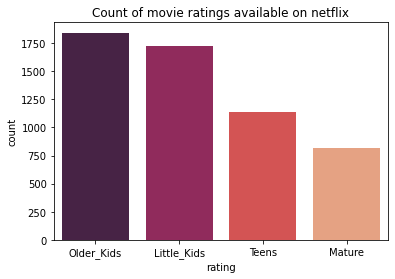

In [43]:
sns.countplot(Netflix_Movie_data['rating'],order=Netflix_Movie_data['rating'].value_counts().index,palette='rocket')
plt.title('Count of movie ratings available on netflix')
plt.show()

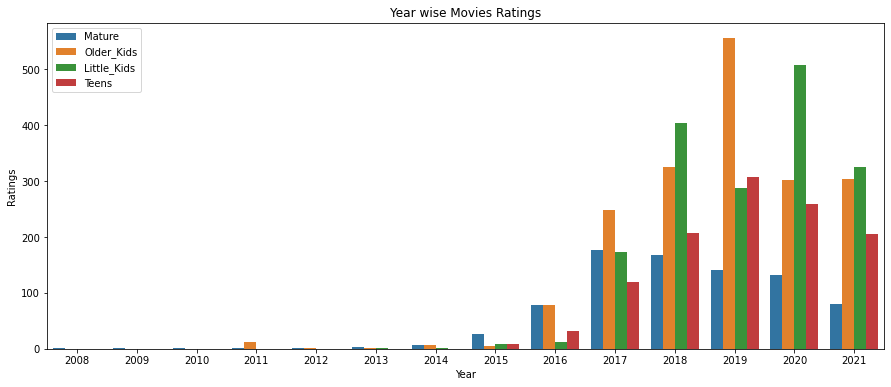

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(data=Netflix_Movie_data.groupby(['release_year','rating'],as_index=False).title.count(),x='release_year',y='title',hue='rating')
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.title('Year wise Movies Ratings')
plt.legend(loc='upper left')
plt.show()

In [45]:
Netflix_Movie_data.release_year.value_counts().sort_index()

2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      14
2015      48
2016     199
2017     718
2018    1107
2019    1293
2020    1202
2021     915
Name: release_year, dtype: int64

We will be using data from 2017 to 2021 as majority of data resides in this date range.

In [46]:
import copy
Netflix_Movie_17_21_data = copy.deepcopy(Netflix_Movie_data.loc['2017':'2021'])

In [47]:
Netflix_Movie_17_21_data.rating = pd.Categorical(Netflix_Movie_17_21_data.rating, 
                      categories=["Little_Kids","Teens","Older_Kids","Mature"],
                      ordered=True)

In [48]:
Netflix_Movie_17_21_data.shape

(5235, 10)

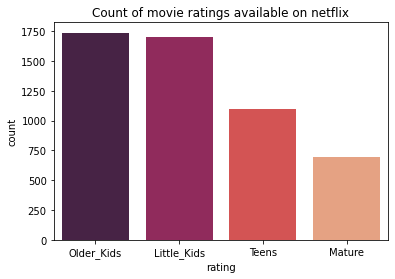

In [49]:
sns.countplot(Netflix_Movie_17_21_data['rating'],order=Netflix_Movie_17_21_data['rating'].value_counts().index,palette='rocket')
plt.title('Count of movie ratings available on netflix')
plt.show()

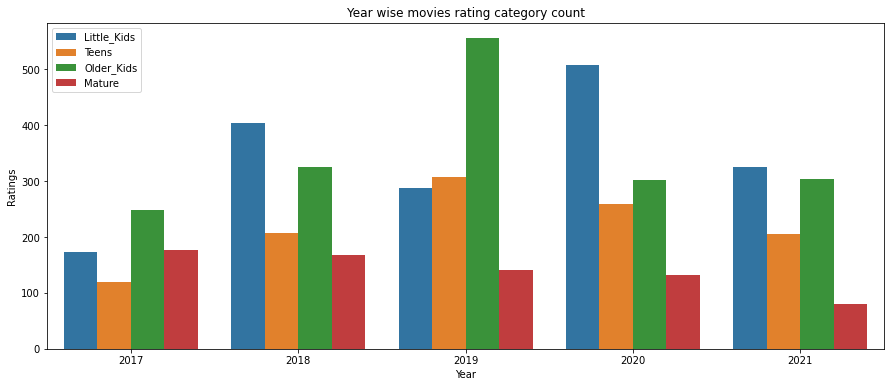

In [50]:
plt.figure(figsize=(15,6))
sns.barplot(data=Netflix_Movie_17_21_data.groupby(['release_year','rating'],as_index=False).title.count(),x='release_year',y='title',hue='rating')
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.title('Year wise movies rating category count')
plt.legend(loc='upper left')
plt.show()

We can clearly see a boom in Older Kids' moves in the year 2019 given their impulsive shopping habits and in general higher conversion rate from a marketing perspective.

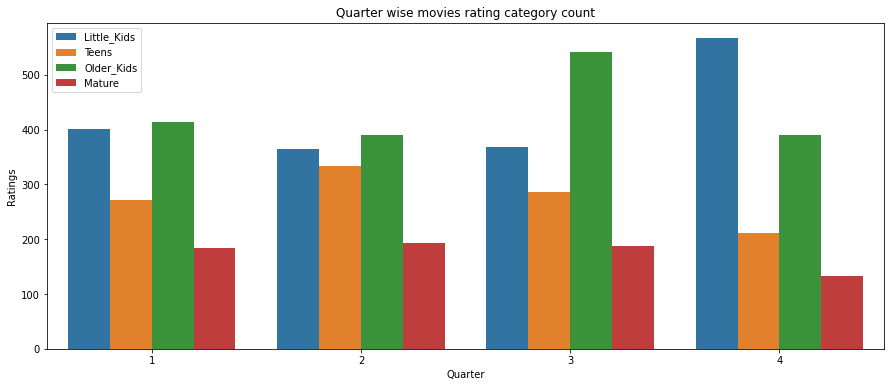

In [51]:
plt.figure(figsize=(15,6))
sns.barplot(data=Netflix_Movie_17_21_data.groupby(['release_quarter','rating'],as_index=False).title.count(),x='release_quarter',y='title',hue='rating')
plt.xlabel('Quarter')
plt.ylabel('Ratings')
plt.title('Quarter wise movies rating category count')
plt.legend(loc='upper left')
plt.show()

In above graph we can clearly see that during holidays season(4 quarter), most of films released were for Little Kids

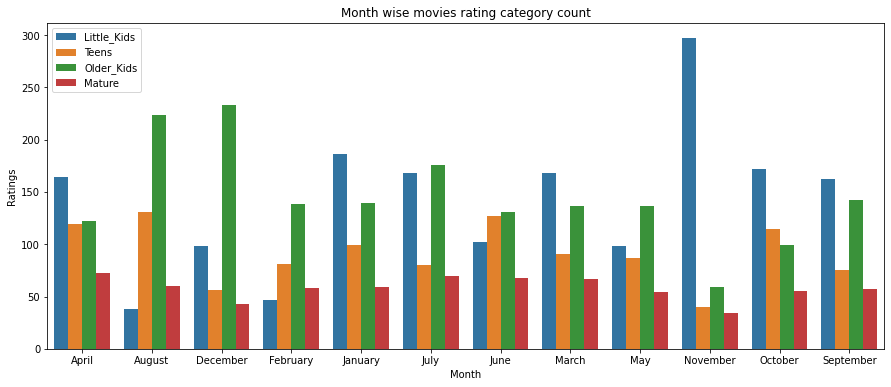

In [52]:
plt.figure(figsize=(15,6))
sns.barplot(data=Netflix_Movie_17_21_data.groupby(['release_month','rating'],as_index=False).title.count(),x='release_month',y='title',hue='rating')
plt.xlabel('Month')
plt.ylabel('Ratings')
plt.title('Month wise movies rating category count')
plt.legend(loc='upper left')
plt.show()

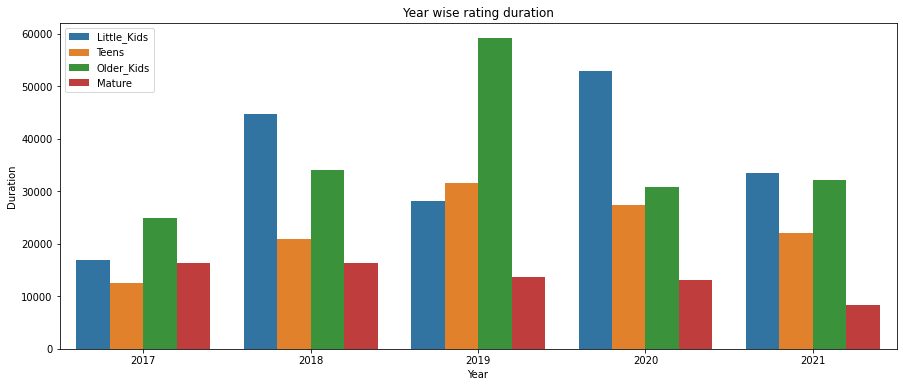

In [53]:
plt.figure(figsize=(15,6))
sns.barplot(data=Netflix_Movie_17_21_data.groupby(['release_year','rating'],as_index=False).duration_in_min.sum(),x='release_year',y='duration_in_min',hue='rating')
plt.xlabel('Year')
plt.ylabel('Duration')
plt.title('Year wise rating duration')
plt.legend(loc='upper left')
plt.show()

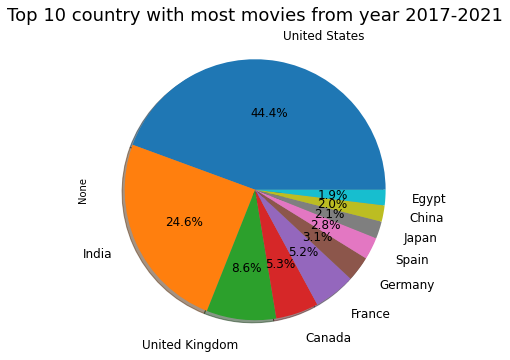

In [54]:
Netflix_Movie_17_21_data.country.apply(pd.Series).stack().value_counts()[:10].plot.pie(figsize=(15,6),autopct='%1.1f%%',fontsize=12, shadow=True,labeldistance=1.2)
plt.title('Top 10 country with most movies from year 2017-2021',fontsize=18)
plt.show()

English being the common language taught and spoken by many countries lead to a ot of content being created by the English speaking countries like America and England. This also shows the influence that the western media has on the rest of the world.

India on the other hand has the next largest amount of content created given it's own film industry known as 'Bollywood'. Bollywood actors collaborate worldwide and thus are followed by many around the world.

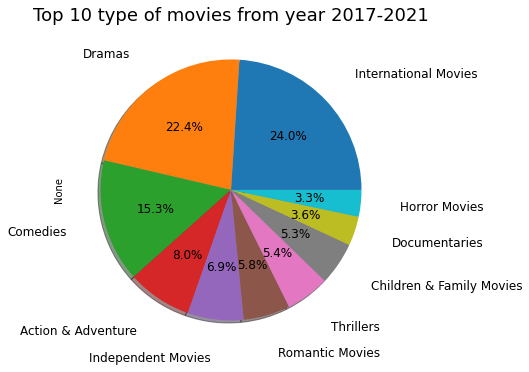

In [55]:
Netflix_Movie_17_21_data.listed_in.apply(pd.Series).stack().value_counts()[:10].plot.pie(figsize=(15,6),autopct='%1.1f%%',fontsize=12, shadow=True,labeldistance=1.3)
plt.title('Top 10 type of movies from year 2017-2021',fontsize=18)
plt.show()

Dramas and comedies seem to be dominating the movie market right after the international movies. International movies include K-Dramas, Animes and various other domains which are highly loved by teens and young adults.

In [56]:
Netflix_Movie_17_21_data.head()

,title,director,cast,country,rating,listed_in,duration_in_min,release_year,release_quarter,release_month
date_added,,,,,,,,,,
2017-01-01,The Land of the Enlightened,[Pieter-Jan De Pue],[Sohrab Nazari],"[Belgium, Ireland, Netherlands, Germany, Afgha...",Older_Kids,"[Documentaries, International Movies]",84,2017,1,January
2017-01-01,Autohead,[Rohit Mittal],"[Deepak Sampat, Ronjini Chakroborty, Vikrant S...",[India],Older_Kids,"[Dramas, International Movies, Thrillers]",97,2017,1,January
2017-01-01,Headwinds,[Jalil Lespert],"[Benoît Magimel, Isabelle Carré, Antoine Dulér...","[France, Belgium]",Older_Kids,"[Dramas, Independent Movies, International Mov...",92,2017,1,January
2017-01-01,Bee Movie,"[Steve Hickner, Simon J. Smith]","[Jerry Seinfeld, Renée Zellweger, Matthew Brod...",[United States],Older_Kids,"[Children & Family Movies, Comedies]",92,2017,1,January
2017-01-01,Hurricane Bianca,[Matt Kugelman],"[Roy Haylock, Bianca Leigh, Denton Blane Evere...",[United States],Older_Kids,"[Comedies, Independent Movies, LGBTQ Movies]",85,2017,1,January


In [57]:
top_10_director = list(Netflix_Movie_17_21_data.director.apply(pd.Series).stack().value_counts()[:10].index)
top_10_cast = list(Netflix_Movie_17_21_data.cast.apply(pd.Series).stack().value_counts()[:10].index)
top_10_country = list(Netflix_Movie_17_21_data.country.apply(pd.Series).stack().value_counts()[:10].index)
top_10_listed_in = list(Netflix_Movie_17_21_data.listed_in.apply(pd.Series).stack().value_counts()[:10].index)

In [58]:
top_10_cast_rating_dict = {}

for cast_nm in top_10_cast:
  top_10_cast_rating_dict[cast_nm] = Netflix_Movie_17_21_data[Netflix_Movie_17_21_data.cast.apply(pd.Series).values == cast_nm].groupby(['rating']).title.count()

In [59]:
pd.DataFrame(top_10_cast_rating_dict).transpose()

rating,Little_Kids,Teens,Older_Kids,Mature
Anupam Kher,17,11,14,0
Shah Rukh Khan,18,6,10,1
Naseeruddin Shah,7,5,20,0
Om Puri,13,3,12,2
Akshay Kumar,5,5,19,1
Paresh Rawal,11,3,13,1
Julie Tejwani,24,0,4,0
Amitabh Bachchan,12,4,12,0
Boman Irani,13,4,9,1
Rupa Bhimani,23,0,4,0


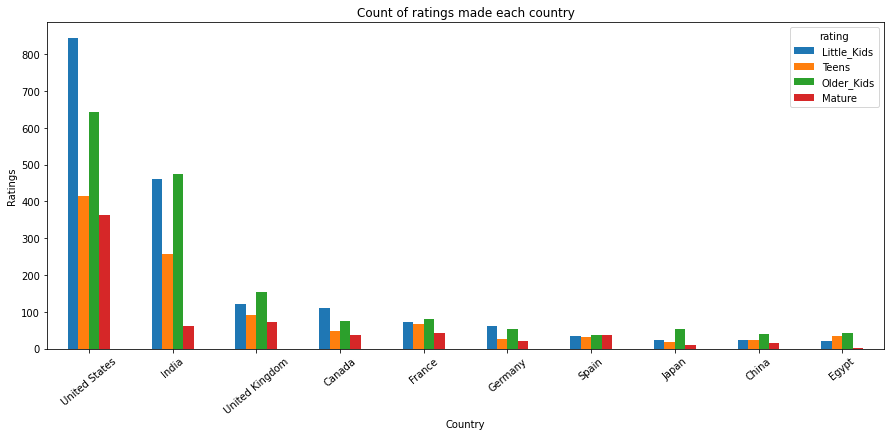

In [60]:
top_10_country_rating_dict = {}

for _ in top_10_country:
  top_10_country_rating_dict[_] = Netflix_Movie_17_21_data[Netflix_Movie_17_21_data.country.apply(pd.Series).values == _].groupby(['rating']).title.count()

pd.DataFrame(top_10_country_rating_dict).transpose().plot.bar(figsize=(15,6))
plt.title('Count of ratings made each country')
plt.xlabel('Country')
plt.ylabel('Ratings')
plt.xticks(rotation=40)
plt.show()

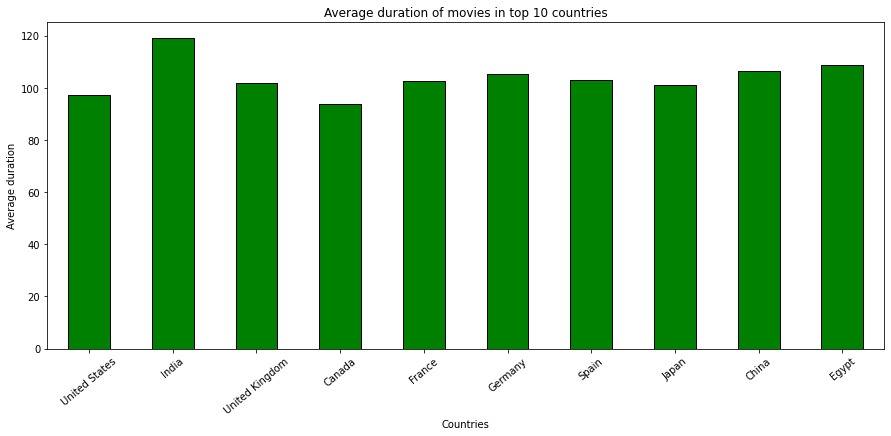

In [61]:
top_10_country_duration_dict = {}

for _ in top_10_country:
  top_10_country_duration_dict[_] = Netflix_Movie_17_21_data[Netflix_Movie_17_21_data.country.apply(pd.Series).values == _].duration_in_min.mean()

pd.Series(top_10_country_duration_dict).plot.bar(figsize=(15,6),edgecolor='black',color='green')
plt.title('Average duration of movies in top 10 countries')
plt.xlabel('Countries')
plt.ylabel('Average duration')
plt.xticks(rotation=40)
plt.show()

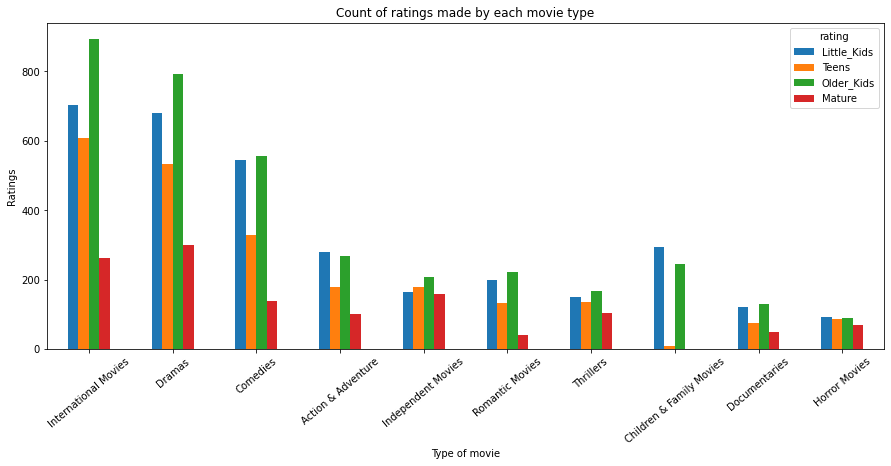

In [62]:
top_10_listed_in_rating_dict = {}

for _ in top_10_listed_in:
  top_10_listed_in_rating_dict[_] = Netflix_Movie_17_21_data[Netflix_Movie_17_21_data.listed_in.apply(pd.Series).values == _].groupby(['rating']).title.count()

pd.DataFrame(top_10_listed_in_rating_dict).transpose().plot.bar(figsize=(15,6))
plt.title('Count of ratings made by each movie type')
plt.xlabel('Type of movie')
plt.ylabel('Ratings')
plt.xticks(rotation=40)
plt.show()

International movies made for older kids have proven to perform well in most of the countries. Content is consumed almost constantly by the infants and little kids as parents tend to leave their kids in front of the screens. Movies with vibrant colours and songs tend to do better with the kids and it's a domain loved by the little kids.

In 'Children & Family Movies' no mature ratings movies were made

In [63]:
pd.DataFrame(top_10_listed_in_rating_dict).transpose()

rating,Little_Kids,Teens,Older_Kids,Mature
International Movies,703,609,895,262
Dramas,679,534,794,299
Comedies,546,329,556,140
Action & Adventure,281,178,267,101
Independent Movies,165,180,209,158
Romantic Movies,200,133,221,42
Thrillers,149,135,168,105
Children & Family Movies,293,10,245,0
Documentaries,121,75,130,48
Horror Movies,92,88,91,69


In [ ]:
top_10_listed_in_duration_dict = {}

for _ in top_10_listed_in:
  top_10_listed_in_duration_dict[_] = Netflix_Movie_17_21_data[Netflix_Movie_17_21_data.listed_in.apply(pd.Series).values == _].duration_in_min.mean()

pd.Series(top_10_listed_in_duration_dict).plot.bar(figsize=(15,6),edgecolor='black',color='yellow')
plt.title('Average duration of movies in top 10 types')
plt.xlabel('Types of movies')
plt.ylabel('Average duration')
plt.xticks(rotation=40)
plt.show()